# Úkol č. 1 - předzpracování dat a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s klasifikační úlohou s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:
* survived - zda pasažér přežil, 0 = Ne, 1 = Ano; **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
    * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména atp.
    * Některé příznaky můžete také úplně zahodit.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. Není potřeba používat sofistikované metody. _Hlavně pozor na metodické chyby!_
    * Můžete využívat i vizualizace a vše stručně ale náležitě komentujte.

  
  * Na připravená data postupně aplikujte **rozhodovací strom** a **metodu nejbližších sousedů**, přičemž pro každý z těchto modelů:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty.
    * Pro model s nejlepšími hodnotami hyperparametrů spočtěte (na validační množině) F1 skóre, nakreslete ROC křivku a určete AUC. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.

        
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model (jednoznačně popište o který konkrétně jde) a správně odhadněte, jakou **přesnost** můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **survived** a identifikátory do sloupce **ID** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

      * Snažte se vše udělat tak, aby přesnost odevzdaných predikcí na vyhodocovacím datasetu byla alespoň **75%**. Pokud bude menší, přijdete o **3 body**.
      * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami survived):
  
```
ID,survived
1000,0
1001,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Data preprocessing

**Import needed libraries**

In [43]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score, roc_curve, auc
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

random_seed = 58

**Read the dataset and display the first few rows**

In [44]:
df = pd.read_csv("data.csv")
display(df.head())

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S,Guernsey
1,1,0,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S,"Sweden Joliet, IL"
2,2,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C,NaN
3,3,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,NaN
4,4,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S,"Nice, France"


**Display the num of unique values for each column**

In [45]:
display(df.nunique())

ID           1000
survived        2
pclass          3
name          998
sex             2
age            93
sibsp           7
parch           8
ticket        747
fare          260
cabin         155
embarked        3
home.dest     308
dtype: int64

**Display the number of missing values in each column**

In [46]:
for col in df:
    missing_count = df[col].isna().sum()
    print("in %s num of missng values is %d" % (col, missing_count))

in ID num of missng values is 0
in survived num of missng values is 0
in pclass num of missng values is 0
in name num of missng values is 0
in sex num of missng values is 0
in age num of missng values is 204
in sibsp num of missng values is 0
in parch num of missng values is 0
in ticket num of missng values is 0
in fare num of missng values is 0
in cabin num of missng values is 775
in embarked num of missng values is 0
in home.dest num of missng values is 427


**Dropping useless columns**

In [47]:
df = df.drop(["ID", "name", "ticket", "cabin", "home.dest"], axis = 1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,2,male,23.0,0,0,10.5000,S
1,0,3,male,24.0,0,0,7.7750,S
2,0,3,male,28.5,0,0,7.2292,C
3,0,3,male,16.0,0,0,9.2167,S
4,1,2,male,3.0,1,1,26.0000,S


**Now check the situation with missed values again (the age will be changed later)**

In [48]:
for col in df:
    missing_count = df[col].isna().sum()
    print("%s is %d" % (col, missing_count))

survived is 0
pclass is 0
sex is 0
age is 204
sibsp is 0
parch is 0
fare is 0
embarked is 0


**Check the situation with the types**

In [49]:
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

**Changig all the object types to categorical and giving them the int value**

In [50]:
df[["sex", "embarked"]] = df[["sex", "embarked"]].apply(lambda x: x.astype("category").cat.codes)

**Check the types and DataFrame overlook after changes**

In [51]:
display(df.dtypes)
display(df.head())

survived      int64
pclass        int64
sex            int8
age         float64
sibsp         int64
parch         int64
fare        float64
embarked       int8
dtype: object

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,2,1,23.0,0,0,10.5000,2
1,0,3,1,24.0,0,0,7.7750,2
2,0,3,1,28.5,0,0,7.2292,0
3,0,3,1,16.0,0,0,9.2167,2
4,1,2,1,3.0,1,1,26.0000,2


**Split up the df**

In [52]:
Xdata = df.drop("survived", axis = 1)
ydata = df["survived"]
display(Xdata.head())
display(ydata.head())

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,23.0,0,0,10.5000,2
1,3,1,24.0,0,0,7.7750,2
2,3,1,28.5,0,0,7.2292,0
3,3,1,16.0,0,0,9.2167,2
4,2,1,3.0,1,1,26.0000,2


0    0
1    0
2    0
3    0
4    1
Name: survived, dtype: int64

# Application of the Decision Tree Classifier and KNN

**Split up the data into the training (0.8%) and testing (0.2%)**

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size = 0.2, random_state = random_seed)

Finding the mean for the age column and replacing it with missing values in that column

In [54]:
age_median_train = Xtrain["age"].mean()
print(age_median_train)
Xtrain["age"] = Xtrain["age"].replace(np.nan, age_median_train)
print("---")
age_median_train = Xtest["age"].mean()
print(age_median_train)
Xtest["age"] = Xtest["age"].replace(np.nan, age_median_train)

29.96617037617555
---
29.60759493670886


**The param grid for the Tree**

In [55]:
param_grid = {
    "max_depth": range(1, 11), 
    "criterion": ["entropy", "gini"],
    "min_samples_leaf": list(range(1, 5))
}
param_comb = ParameterGrid(param_grid)

**Decision Tree**

Decision tree effectively handles both categorical and numerical features. Its interpretability makes it easy to understand which features influence the survival outcome, aligning well with the dataset's structure.

**Training the Decision Tree**

In [56]:
val_metric = []
for params in param_comb:
    t_clf = DecisionTreeClassifier(**params, random_state = random_seed) # create a tree with the current parameters
    curr_split = cross_val_score(t_clf, Xtrain, ytrain, cv = 6) # perform 6-fold cross-validation
    val_metric.append(np.mean(curr_split))

**Finding the best parameters and result for the Decision Tree**

In [57]:
best_tree_params = param_comb[np.argmax(val_metric)] # best params are at param_comb at [index of the max value]
best_tree_result = max(val_metric)
print(f"The best result is {best_tree_result:.4f} with the parameters {best_tree_params}.")

The best result is 0.8162 with the parameters {'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'entropy'}.


**Creating the best Decision Tree model**

In [58]:
best_tree = DecisionTreeClassifier(**best_tree_params, random_state = random_seed).fit(Xtrain, ytrain)

**F1 score for the Desicion Tree**

In [59]:
pred_tree = best_tree.predict(Xtest)
tree_f1_score = f1_score(ytest, pred_tree)
print(f"Decision Tree F1 Score: {tree_f1_score:.4f}")

Decision Tree F1 Score: 0.7397


**ROC and AUC for the Decision Tree**

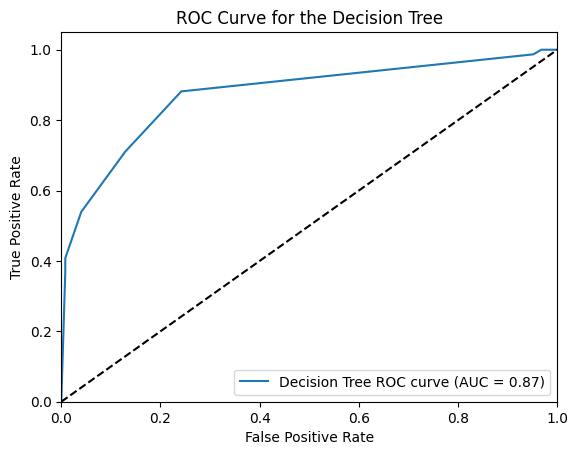

In [60]:
tree_proba = best_tree.predict_proba(Xtest)[:, 1] # Get the predicted probabilities for the survived
fpr_tree, tpr_tree, _ = roc_curve(ytest, tree_proba) # Calculate the false positive rate and true positive rate for various threshold values
tree_auc = metrics.roc_auc_score(ytest, tree_proba) # Compute the AUC for the ROC

plt.figure()
plt.plot(fpr_tree, tpr_tree, label = f"Decision Tree ROC curve (AUC = {tree_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the Decision Tree")
plt.legend(loc = "lower right")
plt.show()

**KNN**

KNN captures local patterns in the data, making predictions based on the similarity between passengers. Aligning with the dataset's
structure and potentially improving prediction accuracy for closely related groups.

**The param grid for the KNN**

In [61]:
param_grid = {
    "n_neighbors": range(1, 11), 
    "weights": ["uniform", "distance"],
}
param_comb = ParameterGrid(param_grid)

**Define scalers for the data normalization**

In [62]:
scalers = [MinMaxScaler(), StandardScaler()]

**Training the KNN**

In [63]:
best_knn_result = 0;
bast_scaler = "";
best_knn_parameters = ParameterGrid("")

for scaler in scalers:
    val_metric = []
    Xtrain_scaled = scaler.fit_transform(Xtrain.copy()) # scale the data depending on the scaler
    for params in param_comb:
        k_clf = KNeighborsClassifier(**params) # create a knn with current parameters
        curr_split = cross_val_score(k_clf, Xtrain_scaled, ytrain, cv = 6) # perform 6-fold cross-validation
        val_metric.append(np.mean(curr_split))
    best_result = max(val_metric) # best result for the current scaler
    best_knn_result = best_result if best_result > best_knn_result else best_knn_result
    best_scaler = scaler if best_result == best_knn_result else best_scaler
    best_knn_parameters = param_comb[np.argmax(val_metric)] if best_result == best_knn_result else best_knn_parameters
    print(f"For the {scaler} the best result is {best_result:.4f} with params {param_comb[np.argmax(val_metric)]}")

For the MinMaxScaler() the best result is 0.8087 with params {'weights': 'uniform', 'n_neighbors': 4}
For the StandardScaler() the best result is 0.8099 with params {'weights': 'uniform', 'n_neighbors': 3}


**Creating the best KNN model**

In [64]:
Xtrain_scaled = best_scaler.fit_transform(Xtrain.copy())
best_knn = KNeighborsClassifier(**best_knn_parameters).fit(Xtrain_scaled, ytrain)

**F1 score for the KNN**

In [65]:
Xtest_scaled = best_scaler.fit_transform(Xtest.copy())

pred_knn = best_knn.predict(Xtest_scaled)
knn_f1_score = f1_score(ytest, pred_knn)
print(f"KNN F1 Score: {knn_f1_score:.4f}")

KNN F1 Score: 0.7075


**ROC and AUC for the KNN**

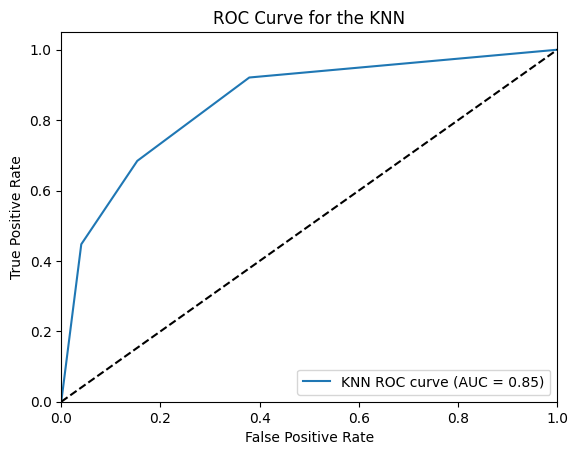

In [66]:
Xtest_scaled = best_scaler.fit_transform(Xtest.copy())
# similar manipuations as with the Decision Tree
knn_proba = best_knn.predict_proba(Xtest_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(ytest, knn_proba)
knn_auc = metrics.roc_auc_score(ytest, knn_proba)

plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f"KNN ROC curve (AUC = {knn_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the KNN")
plt.legend(loc = "lower right")
plt.show()

**Comparing the result of each method**

In [67]:
print("%.04f" % best_tree_result)
print("%.04f" % best_knn_result)

0.8162
0.8099


Because the result and other parameters (auc, f1 score) for tree is better I will choose it as final model

**Creating the final model**

In [68]:
best_clf = DecisionTreeClassifier(**best_tree_params, random_state = random_seed).fit(Xtrain, ytrain)

**Look at the accurace score for the train and test**

In [69]:
print("Train: {:.4f}".format(metrics.accuracy_score(ytrain, best_clf.predict(Xtrain))))
print("Test: {:.4f}".format(metrics.accuracy_score(ytest, best_clf.predict(Xtest))))

Train: 0.8225
Test: 0.8100


We can expect the accuracy for the data model has never seen to be around 0.81

# Prediction for the new data

**Reading and displaying a few first rows for the new data**

In [79]:
pr = pd.read_csv("evaluation.csv")
pr.head()

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5,NaN,S,"Gunnislake, England / Butte, MT"
1,1001,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0,NaN,S,"Norwich / New York, NY"
2,1002,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN
3,1003,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0,NaN,S,"Somerset / Bernardsville, NJ"
4,1004,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,"Philadelphia, PA"


**Making the same manipulations with data set as before**

In [80]:
for col in pr:
    missing_count = pr[col].isna().sum()
    print("in %s num of missng values is %d" % (col, missing_count))

in ID num of missng values is 0
in pclass num of missng values is 0
in name num of missng values is 0
in sex num of missng values is 0
in age num of missng values is 59
in sibsp num of missng values is 0
in parch num of missng values is 0
in ticket num of missng values is 0
in fare num of missng values is 1
in cabin num of missng values is 239
in embarked num of missng values is 2
in home.dest num of missng values is 137


In [81]:
pr = pr.drop(["ID", "name", "ticket", "cabin", "home.dest"], axis = 1)
pr[["sex", "embarked"]] = pr[["sex", "embarked"]].apply(lambda x: x.astype("category").cat.codes)
display(pr.head())
display(pr.dtypes)

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,19.0,0,0,10.5,2
1,2,1,32.0,1,0,26.0,2
2,3,1,60.5,0,0,NaN,2
3,2,0,48.0,1,2,65.0,2
4,1,1,NaN,0,0,39.6,0


pclass        int64
sex            int8
age         float64
sibsp         int64
parch         int64
fare        float64
embarked       int8
dtype: object

In [82]:
age_median_pr = pr["age"].mean()
pr["age"] = pr["age"].replace(np.nan, age_median_pr)
fare_median_pr = pr["fare"].mean()
pr["fare"] = pr["fare"].replace(np.nan, fare_median_pr)

In [83]:
for col in pr:
    missing_count = pr[col].isna().sum()
    print("in %s num of missng values is %d" % (col, missing_count))

in pclass num of missng values is 0
in sex num of missng values is 0
in age num of missng values is 0
in sibsp num of missng values is 0
in parch num of missng values is 0
in fare num of missng values is 0
in embarked num of missng values is 0


**Making a prediction for the new data**

In [84]:
predictions = best_clf.predict(pr)

**Creating a new DataFrame "results" to store the result of the predictions**

In [85]:
ids = range(1000, 1000 + len(predictions))
results = pd.DataFrame({"ID": ids, "survived": predictions})
results.head()

,ID,survived
0,1000,0
1,1001,0
2,1002,0
3,1003,1
4,1004,0


**Storing the predictions in the csv file**

In [86]:
results.to_csv("results.csv", index = False)

In [87]:
print("The number of survived: %d" % results["survived"].sum())

The number of survived: 115


# THE END